# 1.) Import the data from CCLE into a new Google Colab file

In [28]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [29]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [30]:
df = pd.read_csv("/content/gdrive/MyDrive/441winter/insurance.csv")

In [31]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
df.loc[df["sex"] == "female","sex"] = 1
df.loc[df["sex"] == "male","sex"] = 0

df.loc[df["smoker"] == "yes","smoker"] = 1
df.loc[df["smoker"] == "no","smoker"] = 0

df.loc[df["region"] == "southwest", "sw"] = 1
df.loc[df["region"] != "southwest", "sw"] = 0
df.loc[df["region"] == "northwest", "nw"] = 1
df.loc[df["region"] != "northwest", "nw"] = 0
df.loc[df["region"] == "southeast", "se"] = 1
df.loc[df["region"] != "southeast", "se"] = 0

In [33]:
import numpy as np

In [50]:
df

,age,sex,bmi,children,smoker,region,charges,sw,nw,se
0,19,1,27.900,0,1,southwest,16884.92400,1.0,0.0,0.0
1,18,0,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0
2,28,0,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0
3,33,0,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0
4,32,0,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0
1334,18,1,31.920,0,0,northeast,2205.98080,0.0,0.0,0.0
1335,18,1,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0
1336,21,1,25.800,0,0,southwest,2007.94500,1.0,0.0,0.0


In [36]:
x_set = df[["age","sex","bmi","children","smoker","sw","nw","se"]]

# 2.) Split the data into 80/20, in/out sample

In [37]:
cut = int((len(data) * .8) //1) # 700

In [38]:
in_data = x_set[:cut]
out_data = x_set[cut:]
in_target = df["charges"][:cut]
out_target = df["charges"][cut:]

# 3.) Normalize the Data

In [39]:
from sklearn import preprocessing

In [40]:
scaler = preprocessing.StandardScaler().fit(in_data)

In [41]:
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [42]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, ...,  1.76504522,
        -0.55791981, -0.6155209 ],
       [-1.52464584, -0.97964634,  0.4911621 , ..., -0.56655772,
        -0.55791981,  1.6246402 ],
       [-0.81719959, -0.97964634,  0.36455128, ..., -0.56655772,
        -0.55791981,  1.6246402 ],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, ..., -0.56655772,
        -0.55791981, -0.6155209 ],
       [ 1.65886228, -0.97964634, -1.50008089, ..., -0.56655772,
         1.79237229, -0.6155209 ],
       [ 1.02216066,  1.02077653,  0.18367867, ..., -0.56655772,
        -0.55791981,  1.6246402 ]])

# 4.) Get lambda from Lasso cross validation

In [43]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [44]:
modCV = LassoCV().fit(in_data_scale,in_target)

In [57]:
a = modCV.alpha_ 
print("a =",a)

a = 115.9799859390741


# 5.) Run a lasso regression with that Lambda

In [46]:
mod1 = Lasso(alpha = a).fit(in_data_scale,in_target)

In [47]:
mod1.predict(np.array(in_data_scale))
coef1 = mod1.coef_

# 6.) Visualize the coefficients 

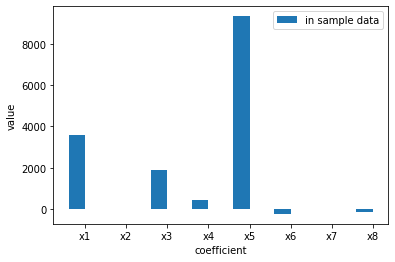

In [49]:
x = ['x1','x2','x3','x4','x5','x6','x7','x8']
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2,coef1,0.4,label='in sample data')

plt.xticks(x_axis,x)
plt.xlabel('coefficient')
plt.ylabel('value')
plt.legend()
plt.show()

# 7.) Interpret the coefficients

The gragh shows the relationship between the charges and other variables. The variable sex and nw do not have significant relationship with the charges with coefficient close to 0. 
The variable smoker significantly influences the charges with a large coefficient. Age, bmi, and children and influence the charges as well, but the effects are not so large.

# 8.) Compare in and out of sample MSE’s

In [51]:
in_pred = mod1.predict(in_data_scale)
out_pred = mod1.predict(out_data_scale)

In [52]:
from sklearn.metrics import mean_squared_error as mse

In [54]:
in_mse = mse(in_pred, in_target)
out_mse = mse(out_pred, out_target)
print("In sample MSE's equals to",in_mse)
print("Out of sample MSE's equals to",out_mse)

In sample MSE's equals to 36521811.462161295
Out of sample MSE's equals to 37152269.57019608


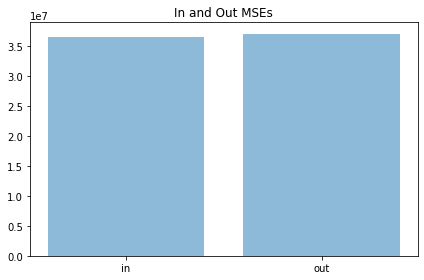

In [55]:
plt.figure(figsize = (6,4))
plt.bar(["in","out"], [in_mse, out_mse], alpha = 0.5)
plt.title("In and Out MSEs")
plt.tight_layout()
plt.show()